In [37]:
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd
from sklearn.preprocessing import Normalizer, normalize
import numpy as np
from scipy.optimize import curve_fit

/tmp/ipykernel_46515/2432763635.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Height[data['Marker'].isin(temp_list)] = data[data['Marker'].isin(temp_list)]['Height']/2
/tmp/ipykernel_46515/2432763635.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Height[data['Marker'].isin(temp_list)] = data[data['Marker'].isin(temp_list)]['Height']/2
/tmp/ipykernel_46515/2432763635.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

0.9928078139443892
---------------
0.9990010180817879
---------------


/tmp/ipykernel_46515/2432763635.py:52: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/tmp/ipykernel_46515/2432763635.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Height[data['Marker'].isin(temp_list)] = data[data['Marker'].isin(temp_list)]['Height']/2
/tmp/ipykernel_46515/2432763635.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Height[data['Marker'].isin(temp_list)] = data[data['Marker'].isin(temp_list)]['Height']/2
/tmp/ipykernel_46515/2432763635.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

0.9917503439455827
---------------


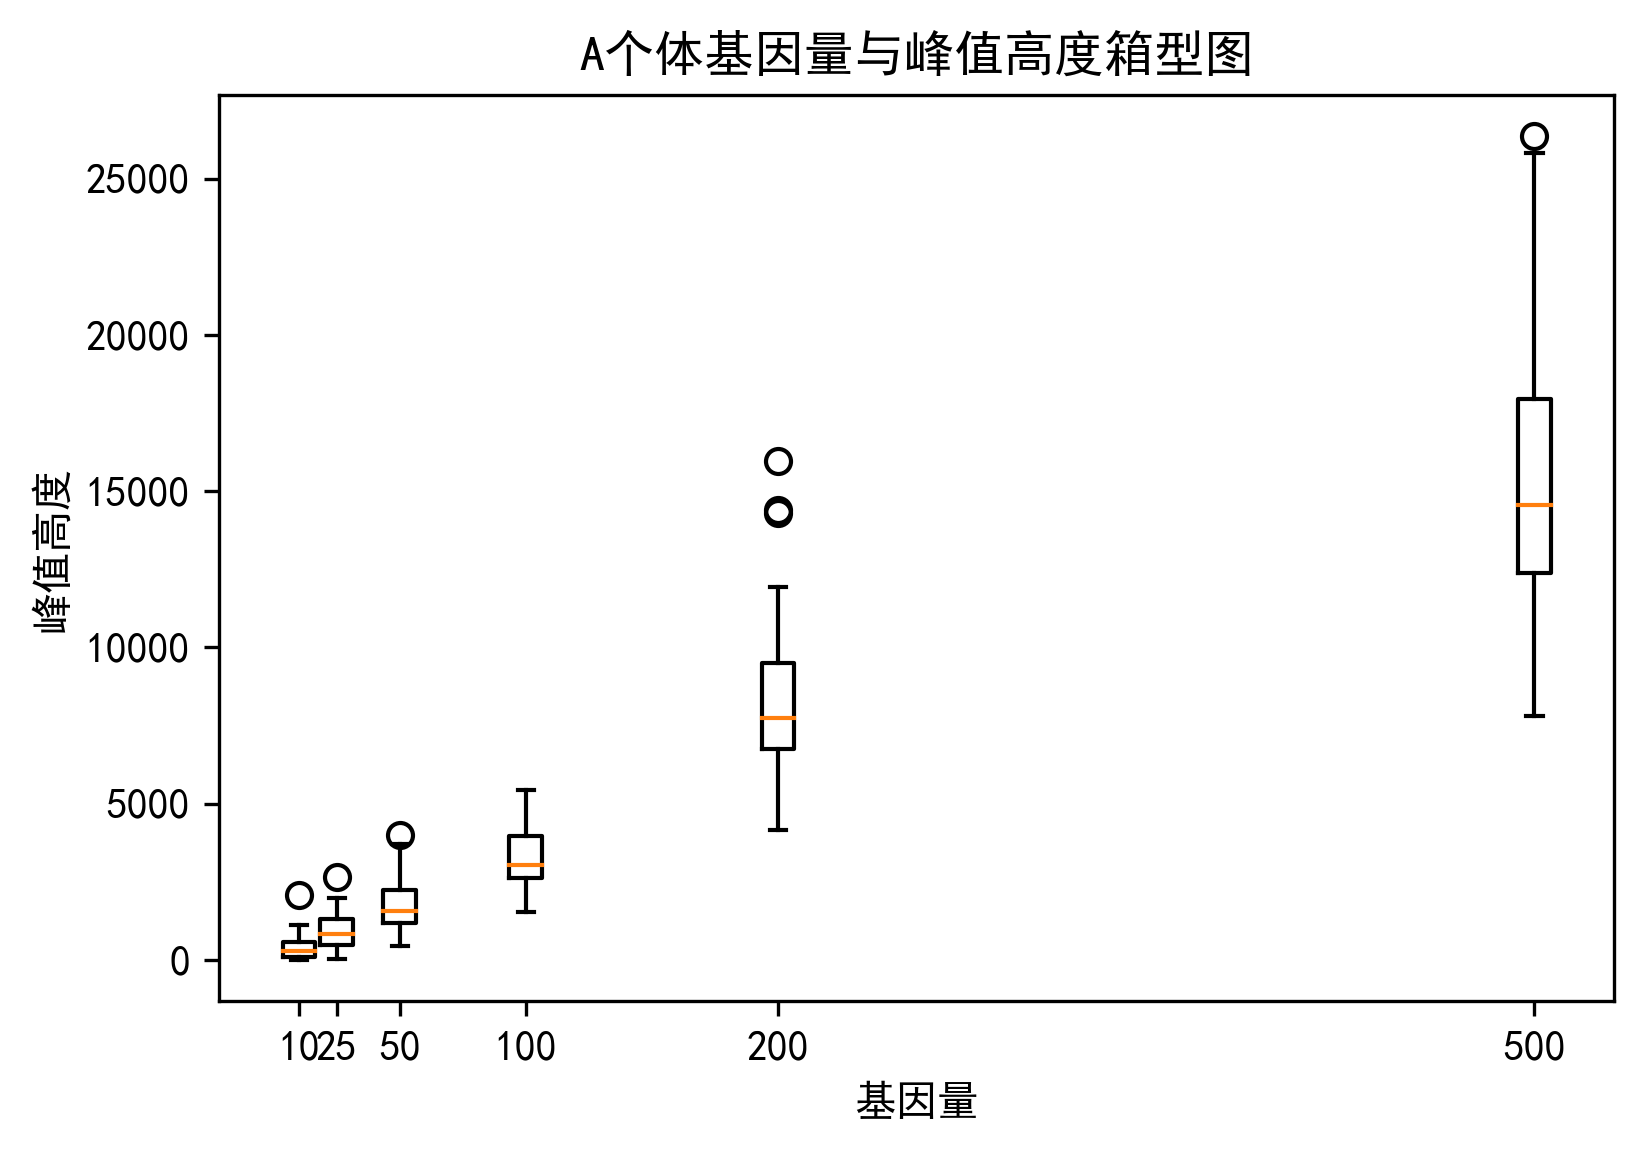

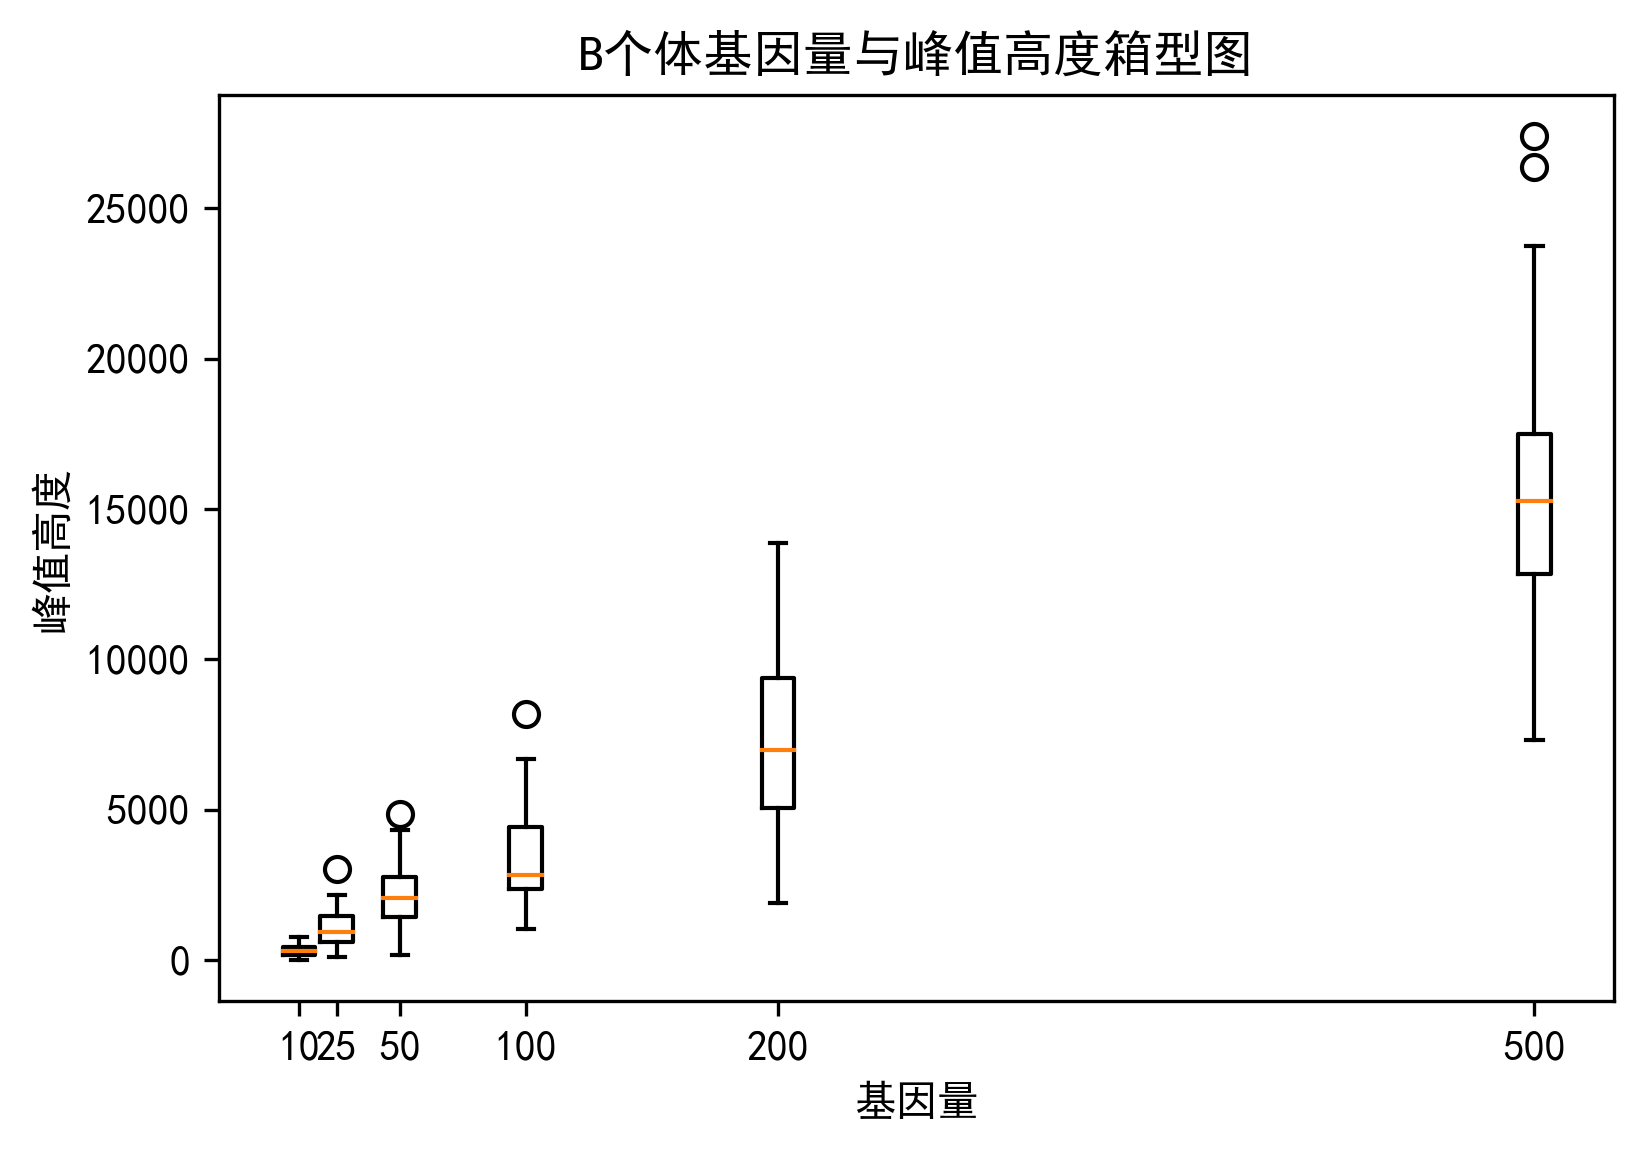

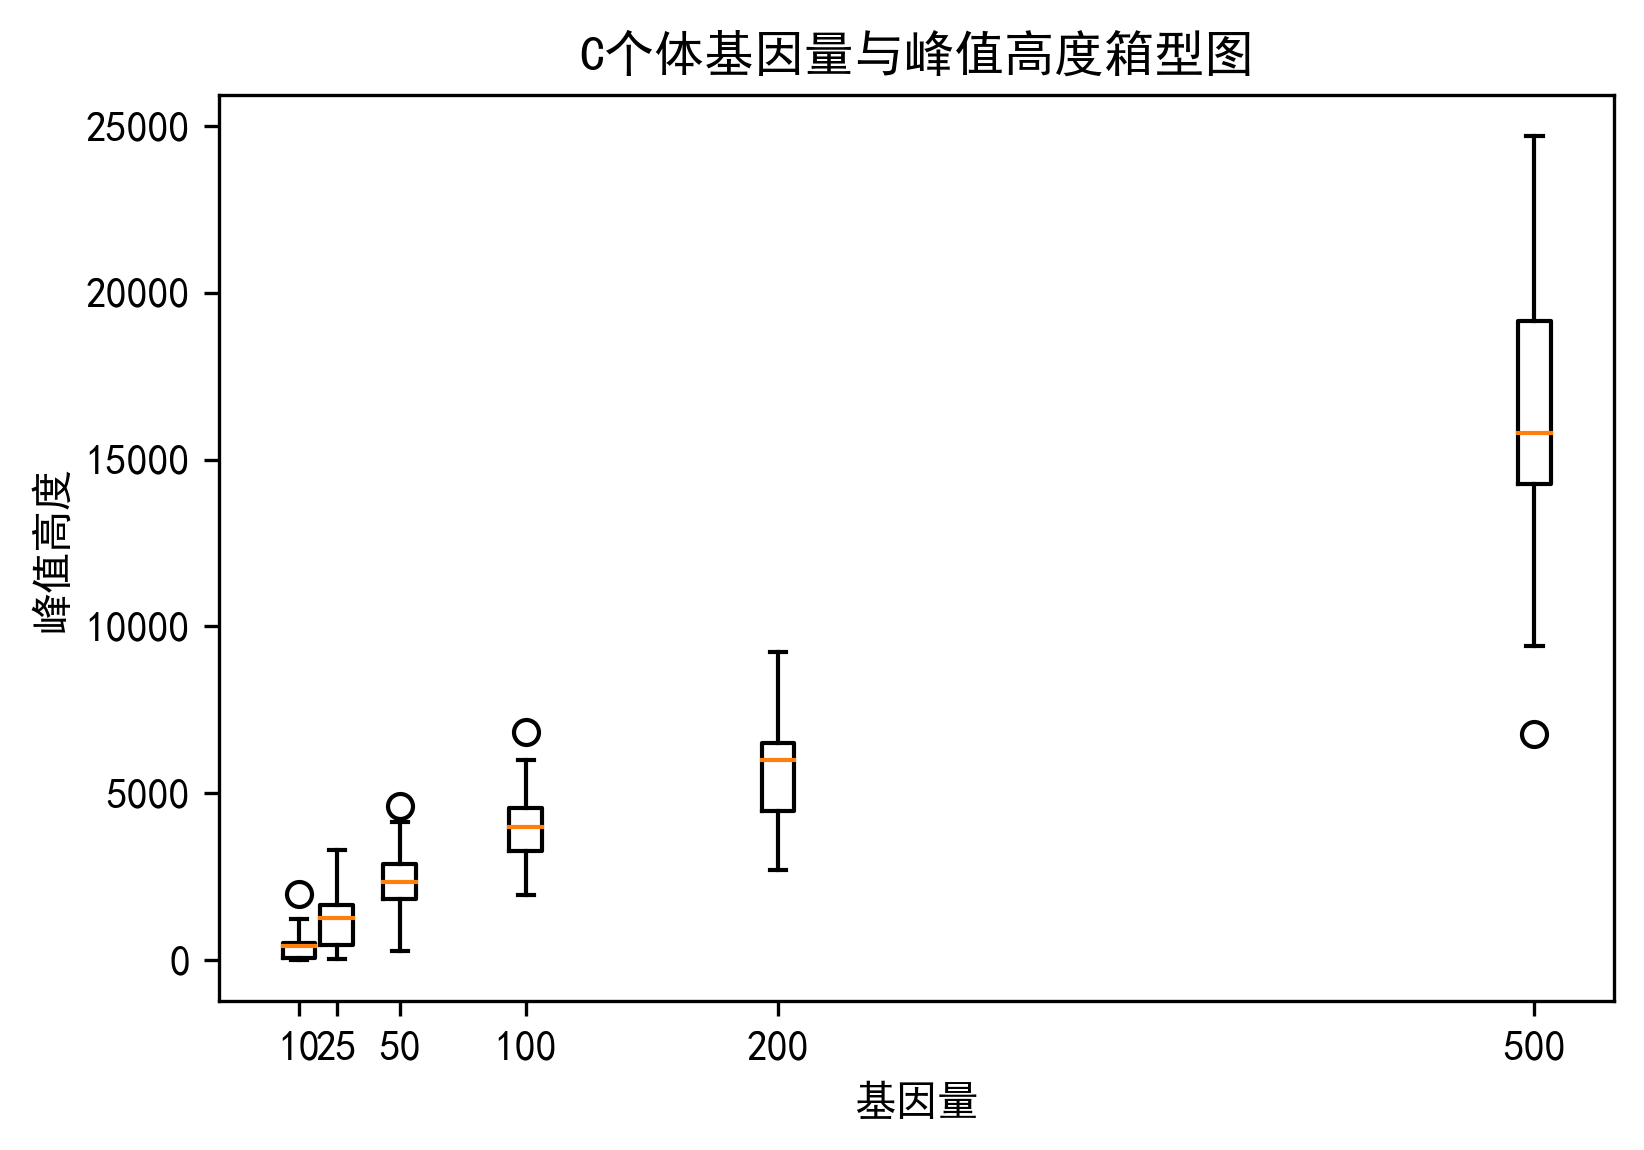

In [40]:
goal_data = {'个体':[], 'a': [], 'b': [], 'c': [], 'R2': []}
for Person in ['A', 'B', 'C']:
    X = [10, 25, 50, 100, 200, 500]
    data_list = []
    length_list = []
    temp_data = []
    for x in X:
        temp_list = []
        data = pd.read_csv(f'data/{Person}{x}_fileter.csv')
        _sum = data['Marker'].value_counts()
        for i in range(len(_sum.values)):
            if _sum.values[i] == 1:
                temp_list.append(_sum.index[i])
        data.Height[data['Marker'].isin(temp_list)] = data[data['Marker'].isin(temp_list)]['Height']/2


        length_list.append(len(data)) # 数据长度存放在这里

        temp_data.extend(data['Height'].values) # 所有的数据存放在这里

    # data_list.append(norm_data)
    x10 = temp_data[0:length_list[0]]
    x25 = temp_data[length_list[0]:length_list[0]+length_list[1]]
    x50 = temp_data[length_list[0]+length_list[1]:length_list[0]+length_list[1]+length_list[2]]
    x100 = temp_data[length_list[0]+length_list[1]+length_list[2]:length_list[0]+length_list[1]+length_list[2]+length_list[3]]
    x200 = temp_data[length_list[0]+length_list[1]+length_list[2]+length_list[3]:length_list[0]+length_list[1]+length_list[2]+length_list[3]+length_list[4]]
    x500 = temp_data[length_list[0]+length_list[1]+length_list[2]+length_list[3]+length_list[4]:length_list[0]+length_list[1]+length_list[2]+length_list[3]+length_list[4]+length_list[5]]

    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    matplotlib.rcParams['font.family']='sans-serif' #解决负号'-'显示为方块的问题
    matplotlib.rcParams['axes.unicode_minus'] = False
    plt.figure(dpi=300)
    plt.title(f'{Person}个体基因量与峰值高度箱型图')
    plt.xlabel('基因量')
    plt.ylabel('峰值高度')
    data = {
        10: x10,
        25: x25,
        50: x50,
        100: x100,
        200: x200,
        500: x500
    }

    df = pd.DataFrame(data, dtype=np.float64)
    # df.boxplot()

    plt.boxplot(df, positions=X, widths=13)

    mean_list = df.mean()
    def func(x, a, b, c):
        return a * np.exp(-b * x) + c

    popt, pcov = curve_fit(func, X, mean_list, maxfev = 10000)

    y2 = [func(i, popt[0],popt[1], popt[2]) for i in X]
    # plt.plot(X, y2,'r--', linewidth=1)
    goal_data['个体'].append(Person)
    goal_data['a'].append(popt[0])
    goal_data['b'].append(popt[1])
    goal_data['c'].append(popt[2])
    # 计算拟合R2
    y_pred = np.array([func(i, popt[0], popt[1], popt[2]) for i in X])
    y_true = mean_list.values
    y_mean = np.mean(y_true)
    SST = np.sum((y_true - y_mean) ** 2)
    SSR = np.sum((y_true - y_pred) ** 2)
    R2 = 1 - SSR / SST
    print(R2)
    print('-'*15)

    # mean = np.mean(mean_list)  # 1.y mean
    # ss_tot = np.sum((mean_list - mean) ** 2)  # 2.total sum of squares
    # ss_res = np.sum((mean_list- func(X, popt[0],popt[1], popt[2])) ** 2)  # 3.residual sum of squares
    # r_squared = 1 - (ss_res / ss_tot)  # 4.r squared

    # goal_data['R2'].append(r_squared)
    # with open(f'img/Box_2{Person}.png','wb') as f:  
    #     plt.savefig(f, format='png', dpi=300)
# pd.DataFrame(goal_data).to_csv('指数拟合.csv', index=False)


In [39]:
np.sum((y_true - y_mean) ** 2)

169719686.7392257